In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

## Loading manually labelled data

In [3]:
data = pd.read_csv('./TrainingSet/binary/bin_dataset_simulink.csv')

In [4]:
# storing length of columns ignoring column 'label'
col_len = data.shape[1]-1

# creating a new column list for the csv as there are no column names from MatLab
cols = [str(each+1)+'A' for each in range(int(col_len/2))] + [str(each+1)+'V' for each in range(int(col_len/2))]

# assigning new column names to the dataframe
data.columns = cols + ['label']

## Ploatting the data 

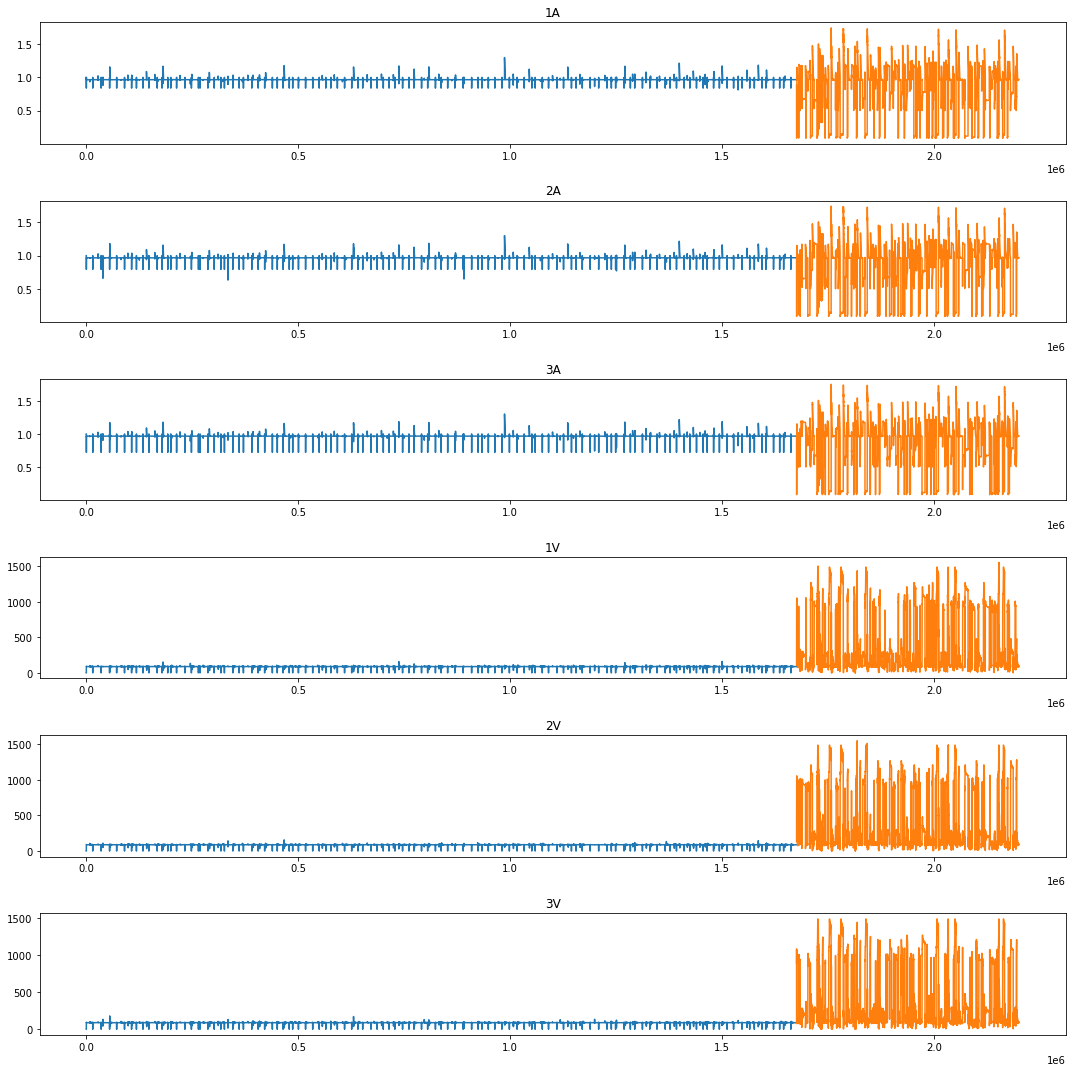

In [5]:
fig, ax = plt.subplots(6,figsize=(15,15))

normal = data[data.label == 0]
abnormal = data[data.label != 0]
for i in range(col_len):

    ax[i].plot(normal[cols[i]],"-")
    ax[i].plot(abnormal[cols[i]],"-")
    ax[i].set_title(cols[i])
fig.tight_layout()


## Creating SVM (support vector machine)

In [6]:
from sklearn import svm

## binary

In [7]:
dataset = pd.read_csv('./TrainingSet/binary/bin_dataset_simulink.csv')
dataset.dropna(inplace = True)

In [8]:
from sklearn.utils import shuffle
dataset = shuffle(dataset)
dataset = dataset.reset_index(drop=True)

In [9]:
# creating training set ignoring labels
train_data = dataset[cols]
labels = dataset['label']

# converting it to list of list from DataFrame
#train_data = train_data.values.tolist()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =   train_test_split(train_data,  labels, test_size=0.20)

In [ ]:
# configuring and fitting the model
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train )

In [ ]:
clf.score(X_test, y_test)

In [ ]:
filename = 'binary_svm.pkl'
pickle.dump(clf, open(filename, 'wb'))

## multi-class

In [ ]:
dataset = pd.read_csv('./TrainingSet/multi/mul_dataset_simulink.csv')
dataset.dropna(inplace = True)

In [ ]:
dataset = shuffle(dataset)
dataset = dataset.reset_index(drop=True)

In [ ]:
train_data = dataset[cols]
labels = dataset['label']

In [ ]:
X_train, X_test, y_train, y_test =   train_test_split(train_data,  labels, test_size=0.20)

In [ ]:
mul_clf = svm.SVC(decision_function_shape='ovr')
mul_clf.fit(X_train, y_train )

In [ ]:
mul_clf.score(X_test, y_test)

In [ ]:
# reading the new dataset from csv
# new dataset with changed simulation length and occurance time
new_data = pd.read_csv('ml_test.csv')
testing  = new_data.values.tolist()

In [ ]:
# predicting the labels for new dataset
gend_labels = clf.predict(testing)

# adding predicted labels to new dataframe
new_data['label'] = gend_labels

In [ ]:
gend_labels = mul_clf.predict(new_data[new_data.label !=0][new_data.columns[:-1]])

In [ ]:
c = 0
for i in range(len(new_data)):
    
    if new_data.iloc[i]['label']!=0:
        new_data['label'].iloc[i] = gend_labels[c]
        c+=1

In [ ]:
# changing column names because MatLab does not assign the column names
new_data.columns = cols + ['label']

In [ ]:
x = list(new_data['label'])

sorted(set(x), key=x.index)

In [ ]:
gend_labels = new_data['label']
total_labels = ['NML', 'AB', 'AC', 'BC', 'ABC', 'AG', 'BG', 'ABG', 'CG', 'ACG', 'BCG', 'ABCG']
df = new_data

x = list(gend_labels)

unq_labels = sorted(set(x), key=x.index)
unq_labels = [total_labels[each] for each in unq_labels]
print(unq_labels)

#df['label'] = df['label'].apply(unq_labels.index)




In [ ]:
from collections import Counter

matrics = sorted(zip([total_labels[each] for each in Counter(gend_labels).keys()],Counter(gend_labels).values() ), key=lambda x: x[1])[:-1]
#print(Counter(gend_labels).values(),[total_labels[each] for each in Counter(gend_labels).keys()])
score = [list(j) for j in matrics][::-1]

In [ ]:
total = sum([i[1] for i in score])

c=0
for i in score:
    
    score[c][1] = str(round(i[1]*100/total,2))+"%"
    #print("Fault type:", i[-1], "Percentage: {:.2f}%".format(i[1]*100/total))
    c+=1


## Plotting predicted data

In [ ]:
print(pd.DataFrame.from_records(score,columns=['Fault type','Percentage']))
plt.hist([total_labels[x] for x in gend_labels if x!=0])
fig, ax = plt.subplots(6,figsize=(15,20))



for j in range(col_len):
    
    
    legend_list = []
    for i in range(len(unq_labels)):

        extract = df[df.label==total_labels.index(unq_labels[i])][cols[j]]    
        
        #print(len(extract))
        if unq_labels[i]==score[0][0]:
            temp = ax[j].scatter(extract.index,extract,marker='+',s=40)
        else:
            temp = ax[j].scatter(extract.index,extract,marker='.',s=10)
        

        legend_list.append(temp)

    ax[j].legend(legend_list,unq_labels,scatterpoints=3,ncol=1,fontsize=15)

fig.tight_layout()
plt.show()
